<center><h1> Clustring model on IRIS dataset </h1></center>

<a id="1"></a>
## 1.Python Libraries

In [42]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.graph_objects as go
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.preprocessing import StandardScaler
import plotly.express as px
#warnings
import warnings
warnings.simplefilter(action='ignore')

<a id="2"></a>
## 2.data loading

In [44]:
#Load data
from sklearn import datasets
iris = pd.read_csv("D:/Academics/AI/Internship/Oasis Infobyte/Projects/Iris/Iris.csv")

x = iris.iloc[:, [0, 1, 2, 3]].values


In [45]:
iris.head().style.background_gradient(cmap =sns.cubehelix_palette(as_cmap=True))

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.100000,3.500000,1.400000,0.200000,Iris-setosa
1,2,4.900000,3.000000,1.400000,0.200000,Iris-setosa
2,3,4.700000,3.200000,1.300000,0.200000,Iris-setosa
3,4,4.600000,3.100000,1.500000,0.200000,Iris-setosa
4,5,5.000000,3.600000,1.400000,0.200000,Iris-setosa


In [46]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


- 1-sepal length in cm
- 2-sepal width in cm
- 3-petal length in cm
- 4-petal width in cm
- 5-class:

In [47]:
# checking the simple statistical parameters 

iris.describe(include='all')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


In [48]:
X = iris.iloc[:,:-1].values #Set our training data

y = iris.iloc[:,-1].values #We'll use this just for visualization as clustering doesn't require labels

<a id="3"></a>
## 3.EDA

In [49]:
# checking the number of rows and columns in train dataset
rows,col=x.shape
print ('Row:' , rows,'\nColumns:',col)

Row: 150 
Columns: 4


In [50]:
#number of null values 
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [51]:
#To check number of uniqe elements in each columns.
iris.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [52]:
fig = px.scatter(data_frame=iris, x='SepalLengthCm',color='Species')
fig.update_layout(width=800, height=600,
                  xaxis=dict(title='sepallength',color="#BF40BF"),
                 yaxis=dict(title="Flower Name",color="#BF40BF"))
fig.show()

In [53]:
fig = px.scatter(data_frame=iris, x='SepalWidthCm',color='Species')
fig.update_layout(width=800, height=600,
                  xaxis=dict(title='sepalwidth',color="#BF40BF"),
                 yaxis=dict(title="Flower Name",color="#BF40BF"))
fig.show()

In [54]:
fig = px.scatter(data_frame=iris, x='PetalLengthCm',color='Species')
fig.update_layout(width=800, height=600,
                  xaxis=dict(title='petallength',color="#BF40BF"),
                 yaxis=dict(title="Flower Name",color="#BF40BF"))
fig.show()

In [55]:
fig = px.scatter(data_frame=iris, x='PetalWidthCm',color='Species')
fig.update_layout(width=800, height=600,
                  xaxis=dict(title='petalwidth',color="#BF40BF"),
                 yaxis=dict(title="Flower Name",color="#BF40BF"))
fig.show()

<a id="5"></a>
## 4.K-MEANS

In [56]:
kmeans_set={"init":"random","n_init":10,"max_iter":300,"random_state":42}

In [57]:
scaler= StandardScaler()
scaled_features= scaler.fit_transform(x)

In [58]:

List=[]
for k in range(1,20):
    kmeans= KMeans(n_clusters=k, **kmeans_set) #** open dictionry
    kmeans.fit(scaled_features)
    List.append(kmeans.inertia_) 

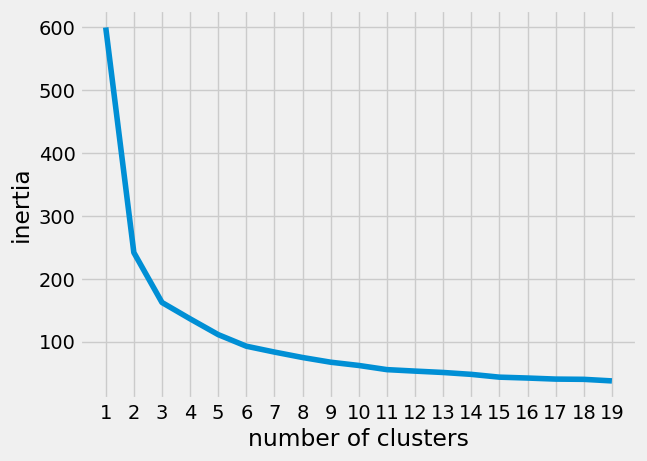

In [59]:
plt.style.use("fivethirtyeight")
plt.plot(range(1,20),List)
plt.xticks(range(1,20))
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.show()

In [61]:
from kneed import KneeLocator
k1=KneeLocator(range(1,20),List , curve='convex', direction= 'decreasing')
k1.elbow

3

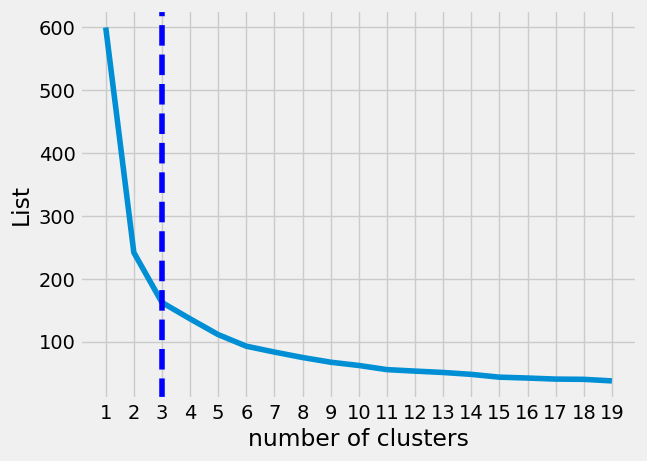

In [62]:
plt.style.use("fivethirtyeight")
plt.plot(range(1,20),List)
plt.xticks(range(1,20))
plt.xlabel('number of clusters')
plt.ylabel('List')
plt.axvline(x=k1.elbow, color='b', label= 'axvline-full height', ls= '--')
plt.show()

In [63]:
silhouette_coefficients =[]
for k in range(2,20):#1 is the worse
    kmeans=KMeans(n_clusters=k, **kmeans_set)
    kmeans.fit(scaled_features)
    score= silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

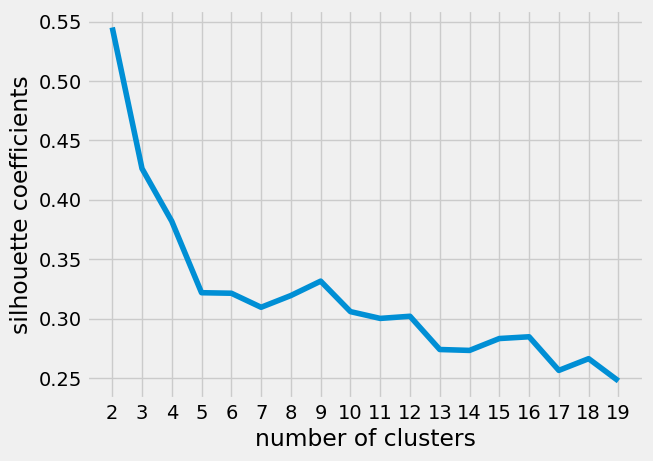

In [64]:
plt.style.use("fivethirtyeight")
plt.plot(range(2,20),silhouette_coefficients)
plt.xticks(range(2,20))
plt.xlabel('number of clusters')
plt.ylabel('silhouette coefficients')
plt.show()

In [65]:
kmeans= KMeans(n_clusters=3, **kmeans_set)
y_kmeans= kmeans.fit_predict(x)

[[125.           6.57058824   2.97058824   5.52352941]
 [ 74.5          5.922        2.78         4.206     ]
 [ 25.           5.00612245   3.42040816   1.46530612]]


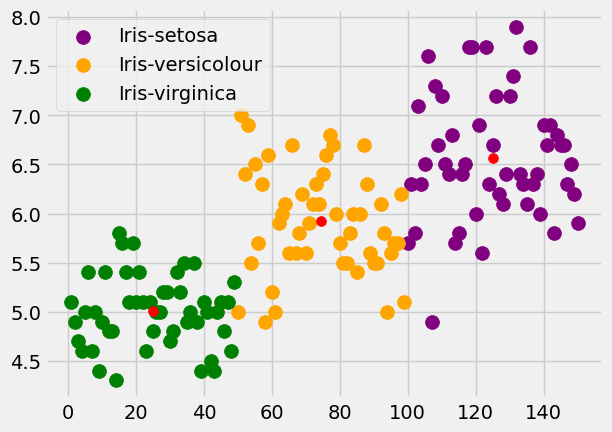

In [66]:

centroids= kmeans.cluster_centers_
print(centroids)
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')
#plotting the centroid of the clusters
plt.scatter(centroids[:,0], centroids[:,1],c='red', s=50)
plt.legend()
plt.show()

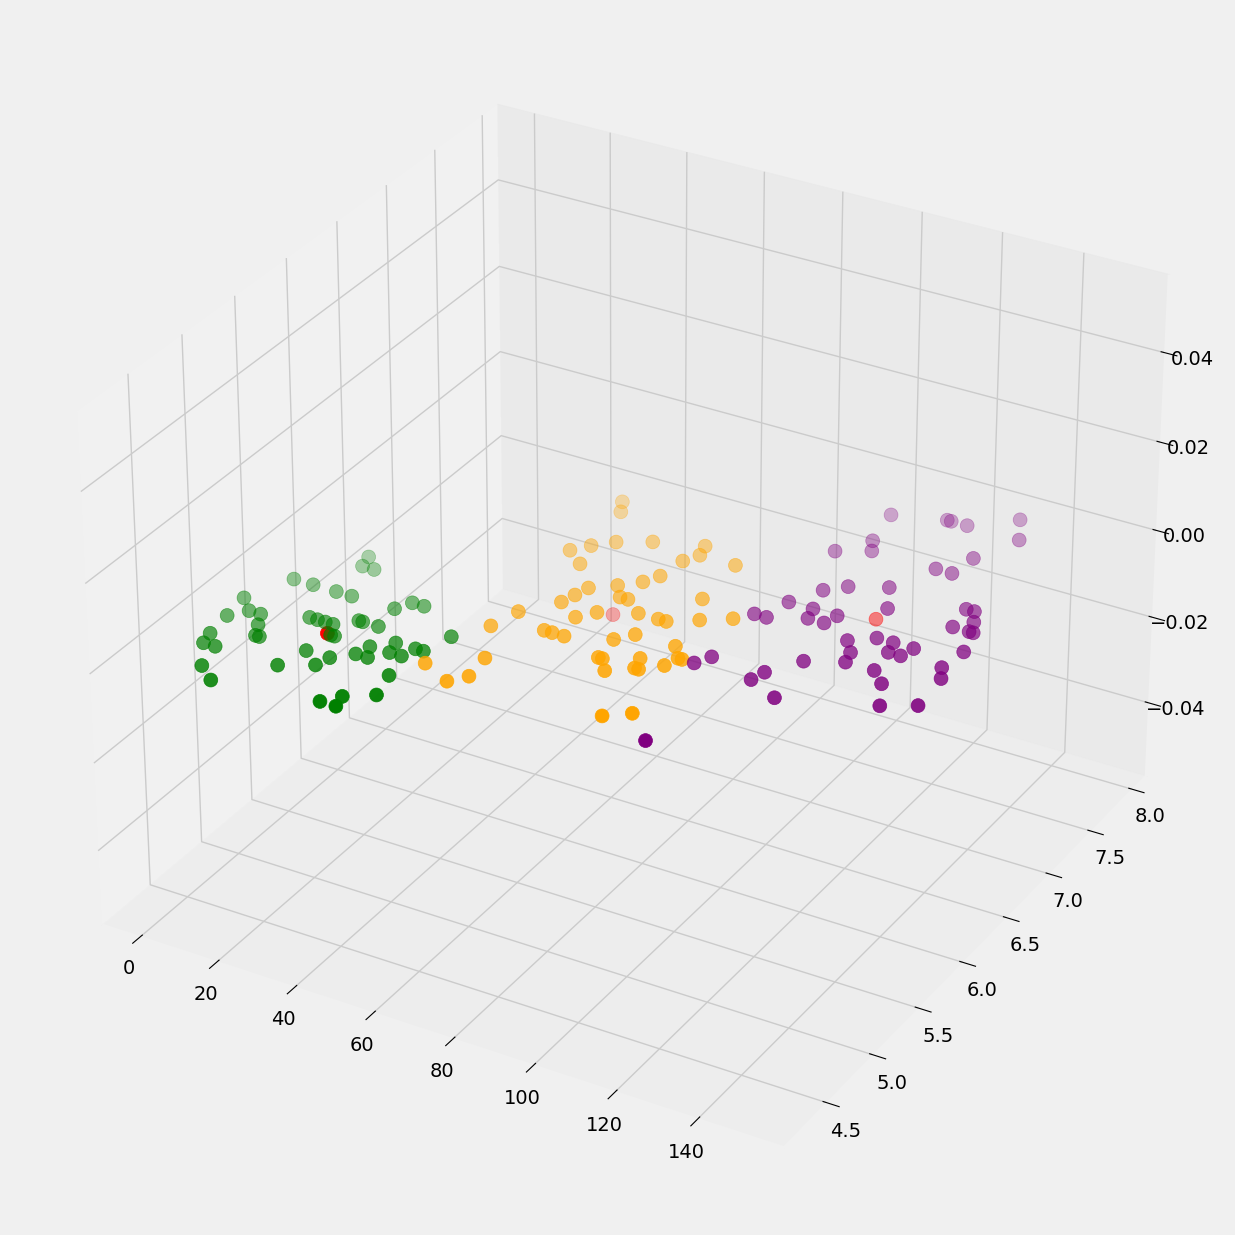

In [67]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.show()

In [68]:
kmeans= KMeans(n_clusters=3, **kmeans_set).fit(x)


In [69]:
cluster=kmeans.labels_

In [70]:
cluster  #our tag values are between 0-2

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [71]:
#let's divide our data into groups
iris["cluster_no"]=cluster
iris.head(12)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster_no
0,1,5.1,3.5,1.4,0.2,Iris-setosa,2
1,2,4.9,3.0,1.4,0.2,Iris-setosa,2
2,3,4.7,3.2,1.3,0.2,Iris-setosa,2
3,4,4.6,3.1,1.5,0.2,Iris-setosa,2
4,5,5.0,3.6,1.4,0.2,Iris-setosa,2
5,6,5.4,3.9,1.7,0.4,Iris-setosa,2
6,7,4.6,3.4,1.4,0.3,Iris-setosa,2
7,8,5.0,3.4,1.5,0.2,Iris-setosa,2
8,9,4.4,2.9,1.4,0.2,Iris-setosa,2
9,10,4.9,3.1,1.5,0.1,Iris-setosa,2


In [72]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster_no
145,146,6.7,3.0,5.2,2.3,Iris-virginica,0
146,147,6.3,2.5,5.0,1.9,Iris-virginica,0
147,148,6.5,3.0,5.2,2.0,Iris-virginica,0
148,149,6.2,3.4,5.4,2.3,Iris-virginica,0
149,150,5.9,3.0,5.1,1.8,Iris-virginica,0


In [73]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=X[y_kmeans == 0, 0], y=X[y_kmeans == 0, 1],
    mode='markers',marker_color='#DB4CB2',name='Iris-setosa'
))

fig.add_trace(go.Scatter(
    x=X[y_kmeans == 1, 0], y=X[y_kmeans == 1, 1],
    mode='markers',marker_color='#c9e9f6',name='Iris-versicolour'
))

fig.add_trace(go.Scatter(
    x=X[y_kmeans == 2, 0], y=X[y_kmeans == 2, 1],
    mode='markers',marker_color='#7D3AC1',name='Iris-virginica'
))

fig.add_trace(go.Scatter(
    x=centroids[:, 0], y=centroids[:,1],
    mode='markers',marker_color='#CAC9CD',marker_symbol=4,marker_size=13,name='Centroids'
))
fig.update_layout(template='plotly_dark',width=1000, height=500,)